# 使用梯度上升法求解主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size=100)

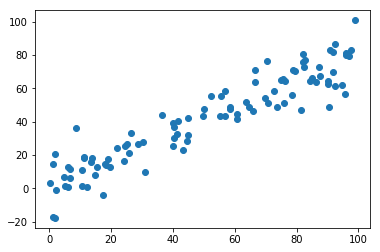

In [9]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [10]:
def demean(X):
    return X - np.mean(X, axis=0)

In [11]:
X_demean = demean(X)

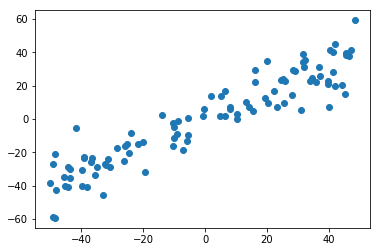

In [12]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.show()

In [13]:
np.mean(X_demean[:, 0])

1.715960706860642e-14

In [14]:
np.mean(X_demean[:, 1])

-1.2789769243681804e-14

## 梯度上升法

In [15]:
def f(w, X):
    return np.sum((X.dot(w) ** 2)) / len(X)

In [16]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2 / len(X)

In [17]:
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

In [18]:
def direction(w):
    return w / np.linalg.norm(w)

def gradient_aescent(df, X, initial_w, eta, n_inters=1e4, epsilon=1e-8):
    w = direction(initial_w)
    curr_inter = 0
    while curr_inter < n_inters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)  # 注意：每次求一个单位向量
        if abs(f(w, X) - f(last_w, X)) < epsilon:
            break
        curr_inter += 1
    return w

In [23]:
initial_w = np.random.random(X.shape[1])  # 注意：不能0向量开始
initial_w

array([0.23866167, 0.49487386])

In [24]:
eta = 0.001

In [25]:
# 注意：不能使用StandardScaler数据归一化

In [26]:
gradient_aescent(df_debug, X_demean, initial_w, eta)

array([0.77028163, 0.63770386])

In [27]:
gradient_aescent(df_math, X_demean, initial_w, eta)

array([0.77028163, 0.63770386])

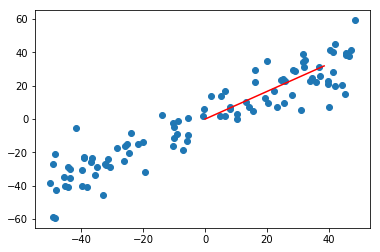

In [28]:
w = gradient_aescent(df_math, X_demean, initial_w, eta)
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([0, w[0]*50], [0, w[1]*50], color="r")
plt.show()

In [38]:
X2 = np.empty((100, 2))
X2[:, 0] = np.random.uniform(0., 100., size=100)
X2[:, 1] = 0.75 * X2[:, 0] + 3.

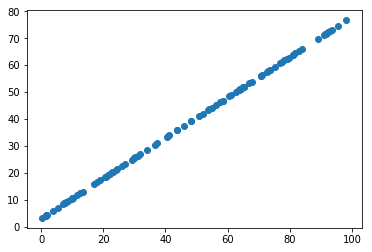

In [40]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [41]:
X2_demean = demean(X2)

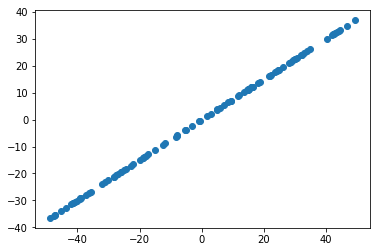

In [42]:
plt.scatter(X2_demean[:, 0], X2_demean[:, 1])
plt.show()

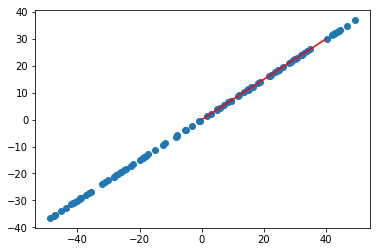

In [44]:
w = gradient_aescent(df_math, X2_demean, initial_w, eta)
plt.scatter(X2_demean[:, 0], X2_demean[:, 1])
plt.plot([0, w[0]*50], [0, w[1]*50], color="r")
plt.show()